#  Project: Investigate TMDb movie data set

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This little project should help the author to improve his data analytics skills and explore some of the success criteria for movies.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

Load your data and print out a few lines. Perform operations to inspect data
types and look for instances of missing or possibly errant data.

In [3]:
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
print("The Dataframe contains {} rows and {} Columns .".format(df.shape[0] , df.shape[1]))

The Dataframe contains 10866 rows and 21 Columns .


Some information about each column separately.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Here We can see some useful statistics in our dataset.

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09




### Data Cleaning (Replace this with more specific notes!)

After discussing the structure of the data and any problems that need to be
cleaned, perform those cleaning steps in the second part of this section.

In [20]:
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)


here we droped any na values from our dataset.

In [21]:
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 0 to 10760
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1287 non-null   int64  
 1   imdb_id               1287 non-null   object 
 2   popularity            1287 non-null   float64
 3   budget                1287 non-null   float64
 4   revenue               1287 non-null   float64
 5   original_title        1287 non-null   object 
 6   cast                  1287 non-null   object 
 7   homepage              1287 non-null   object 
 8   director              1287 non-null   object 
 9   tagline               1287 non-null   object 
 10  keywords              1287 non-null   object 
 11  overview              1287 non-null   object 
 12  runtime               1287 non-null   float64
 13  genres                1287 non-null   object 
 14  production_companies  1287 non-null   object 
 15  release_date        

In [44]:
#  We Have to Seperate the values of the cast Columns .
df_cast = df["cast"].str.split('|' , expand=True).rename(columns= lambda x : f"cast_{x+1}")
df_dir = (df['director'].str.split('|', expand=True).rename(columns=lambda x: f"director_{x+1}"))
df_key = (df['keywords'].str.split('|', expand=True).rename(columns=lambda x: f"keywords_{x+1}"))
df_gen = (df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genres_{x+1}"))
df_pc = (df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_companies_{x+1}"))


joining all the spererated dfs and Drop all not needed columns

In [ ]:

df = df.join([df_cast , df_pc , df_gen , df_key , df_dir]) 
df = df.drop(['cast', 'keywords', 'director', 'genres', 'production_companies', 'imdb_id', 'homepage', 'overview', 'release_date', 'tagline'], axis=1)

In [24]:
print("The Dataframe contains {} rows and {} Columns .".format(df.shape[0] , df.shape[1]))

The Dataframe contains 1287 rows and 37 Columns .


Check for Duplicates 

In [25]:

df.duplicated().sum()

0

This line shows us that we have dupicated original_title entries

In [26]:
df['original_title'].value_counts().head()

Clash of the Titans    2
Halloween              2
The Fog                2
Halloween II           2
The Thing              2
Name: original_title, dtype: int64

a function "check_double_title" was defined to have a closer look in the rows with same movie title.

In [27]:
limit_4_title = df['original_title'].value_counts().index.tolist()
limit_4_title = limit_4_title[:4]

def check_double_title(titles):
    for limit in titles:
        df_title = df[df['original_title'] == limit]
        print(df_title.iloc[:,:5])
        print('---------------------------------------------------------------------')
check_double_title(limit_4_title)

         id  popularity       budget      revenue       original_title
1940  18823    2.087252  125000000.0  232713139.0  Clash of the Titans
8425  10323    0.203260   15000000.0   41092328.0  Clash of the Titans
---------------------------------------------------------------------
         id  popularity      budget     revenue original_title
7483   2082    0.809646  15000000.0  80253908.0      Halloween
10759   948    1.198849    300000.0  70000000.0      Halloween
---------------------------------------------------------------------
       id  popularity      budget     revenue original_title
6312  791    0.608364  18000000.0  46201432.0        The Fog
7324  790    0.659182   1000000.0  21378361.0        The Fog
---------------------------------------------------------------------
         id  popularity      budget     revenue original_title
1546  24150    0.565345  15000000.0  39421467.0   Halloween II
8391  11281    0.564939   2500000.0  25533818.0   Halloween II
----------------

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: Which genres are most popular from year to year?

Adding release Years to the dataframe

In [28]:

genres_df = df.loc[:,'genres_1' : 'genres_5']
genres_release_df = genres_df.join(df['release_year'])
genres_release_df

,genres_1,genres_2,genres_3,genres_4,genres_5,release_year
0,Action,Adventure,Science Fiction,Thriller,None,2015
1,Action,Adventure,Science Fiction,Thriller,None,2015
2,Adventure,Science Fiction,Thriller,None,None,2015
3,Action,Adventure,Science Fiction,Fantasy,None,2015
4,Action,Crime,Thriller,None,None,2015
...,...,...,...,...,...,...
10595,Adventure,Action,Thriller,None,None,1973
10689,Adventure,Action,Thriller,None,None,1965
10724,Adventure,Action,Thriller,None,None,1969
10759,Horror,Thriller,None,None,None,1978


In [29]:
# Array of Years existed in release year.
years = genres_release_df['release_year'].unique()
most_common = []
# Create most common list 
for year in years:
    #Create filtered df with existing years in years variable
    a_df = genres_release_df[genres_release_df['release_year'] == year]
    b_df = a_df.drop(['release_year'] , axis = 1)
    #Using the stack() function will reshape the dataframe by converting the data into a stacked form.
    #idxmax() stores the index of maximum count
    c_df = b_df.stack().value_counts().idxmax()
    #DataFrame for respective years
    x_df = df[df['release_year'] == year]
    #The idxmax() function is used to get the row label of the maximum value.
    #If multiple values equal the maximum,the first row label with that value is returned
    y_df = x_df.groupby(['genres_1'])['vote_average'].mean().idxmax()
    if c_df == y_df:
        is_equal = "Equal"
    else:
        is_equal ="Not Equal"
    # Append Results to the most_common list 
    most_common.append((year , c_df , y_df , is_equal))
    
#Create a df for the most_common list
    
most_common_df = (pd.DataFrame(most_common , columns = ["release_year" , "popular_produced" , "popular_voted" , "is_equal"])
                  .sort_values("release_year").reset_index().drop(["index"] , axis=1))
most_common_df
    
    

,release_year,popular_produced,popular_voted,is_equal
0,1961,Comedy,Comedy,Equal
1,1962,Action,Adventure,Not Equal
2,1963,Action,Action,Equal
3,1964,Action,Adventure,Not Equal
4,1965,Action,Adventure,Not Equal
5,1967,Action,Action,Equal
6,1969,Action,Adventure,Not Equal
7,1971,Thriller,Action,Not Equal
8,1972,Crime,Drama,Not Equal
9,1973,Thriller,Drama,Not Equal


 need to know How many popular produced movies matches the popular voted

In [30]:
most_common_df['is_equal'].value_counts()

Not Equal    42
Equal         9
Name: is_equal, dtype: int64

# Question Two : Is Revenue Related to the popularity? 

defining a new dataframe sorted using revenue column

In [40]:
biggest_revenue = df.sort_values(by=['revenue']).head(200)
biggest_revenue.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,1.276423e+05,0.0
4553,113594,tt2288005,0.495457,0,0,A Turtleâ€™s Tale 2: Sammyâ€™s Escape From Par...,Kaitlyn Maher|Carter Hastings|Alan Shearman|Kh...,NaN,Ben Stassen|Vincent Kesteloot,NaN,...,"Sammy and Ray, leatherback turtles and friends...",92,Animation|Adventure,Studio Canal|Warner Bros.|uFilm|nWave Pictures,8/15/12,40,5.7,2012,0.000000e+00,0.0
4552,101179,tt1838722,0.505292,0,0,Truth or Dare,Liam Boyle|Jack Gordon|Florence Hall|David Oak...,http://www.truthordarefilm.com/,Robert Heath,Truth or Die,...,A group of college friends celebrate the end o...,95,Horror|Thriller|Mystery,Corona Pictures,8/5/12,57,5.6,2012,0.000000e+00,0.0
4551,110160,tt1650048,0.516461,9500000,0,Laurence Anyways,Melvil Poupaud|Suzanne ClÃ©ment|Nathalie Baye|...,NaN,Xavier Dolan,NaN,...,"Set in the 1980s and 1990s, a man tries to sal...",168,Drama|Romance,MK2 Productions,5/18/12,84,7.5,2012,9.022571e+06,0.0
4549,119360,tt1801061,0.518686,0,0,Io e te,Jacopo Olmo Antinori|Tea Falco|Sonia Bergamasc...,NaN,Bernardo Bertolucci,NaN,...,An introverted teenager tells his parents he i...,103,Drama,Medusa Film|Fiction Films|Wildside|Ministero p...,9/18/12,23,5.6,2012,0.000000e+00,0.0


Plotting the result of obtaining the relationship between popularity and revenue.

<AxesSubplot:title={'center':'popularity by revenue'}, xlabel='popularity', ylabel='revenue'>

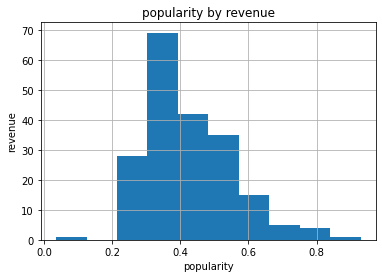

In [41]:
plt.ylabel('revenue')
plt.xlabel('popularity')
plt.title("popularity by revenue")
biggest_revenue.popularity.hist()

The answer of question two is no ..

# Question Three : Are Longer Movies Have more Popularity Or Not ? 

Sort movies by revenue in descending order

In [42]:
longer_movies = df.sort_values(by=["runtime"] , ascending = False).head(200)
runtime = longer_movies.runtime
popularity = longer_movies.popularity

Plotting the result of obtaining the relationship between popularity and runtime.

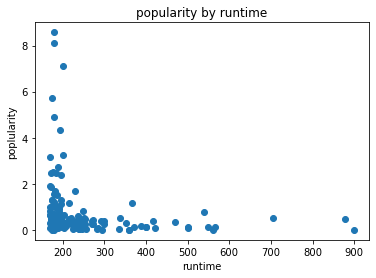

In [43]:
plt.xlabel("runtime")
plt.ylabel("poplularity")
plt.title("popularity by runtime")
plt.scatter(runtime , popularity)
plt.show()

here we can say that the answer of this question is no, shorter movies have more popularity in our dataset.

# Conclusions

The first research question "Which genres are most popular from year to year?" 
has shown surprising results, as the most popular genre differed a lot. To the authors surprise, 
only in 11 occasions the most frequent produced genres was also voted as best genre by the users. 
In all remaining 40 occasions the two values differed.

The second research question "Is Revenue Related to the popularity?" 
indicate that the revenue of films doesn't related with the popularity ..

THe Third Question "Are Longer Movies Have more Popularity Or Not ?" the answer is vice versa .
Shorter movies has more popularity than longer movies.

All results are limited to the underlying data set and as no advaned statistics were performed, the results can only be treated as indicators and are not generalizable. Furthermore, one has to consider that many entries in the dataset have been removed due to missing data